<a href="https://colab.research.google.com/github/shoutingraven369/heart_disease_dataset/blob/main/Heart_disease_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report

In [4]:
df= pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [51]:
df.dropna(axis=0,inplace=True)

<Axes: >

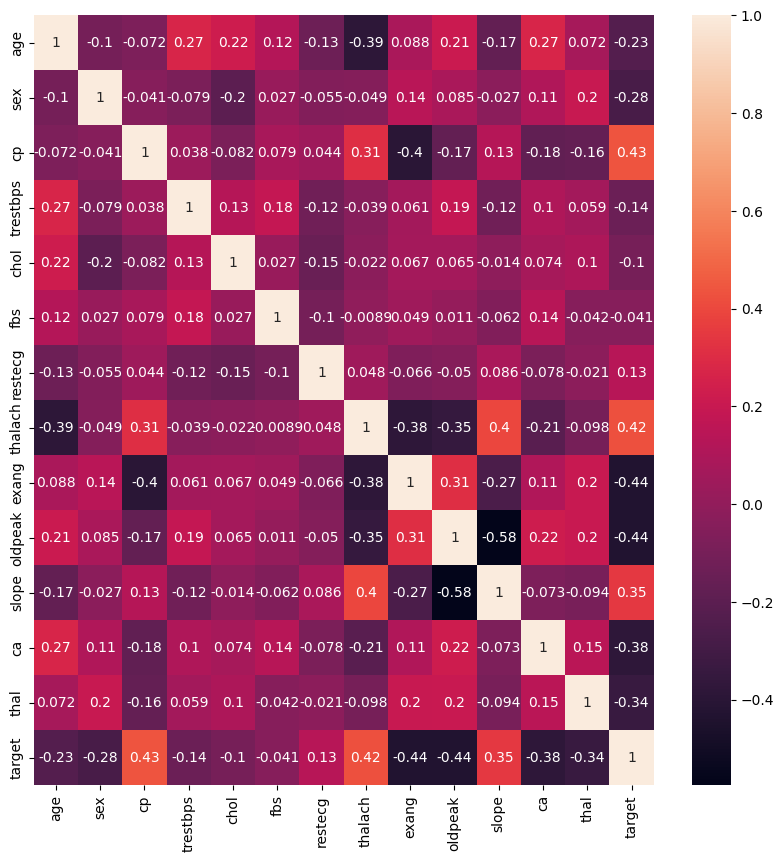

In [14]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [17]:
X_train , X_test ,y_train , y_test = train_test_split(df.drop('target',axis=1),df['target'], train_size=0.2,random_state=42)

In [18]:
model =DecisionTreeClassifier( max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
y_pred =model.predict(X_test)

# Evaluation

In [34]:
print("Accuracy_score:\n",accuracy_score(y_test,y_pred))

print ('confusion_matrix:\n',confusion_matrix(y_test,y_pred))


Accuracy_score:
 0.7987804878048781
confusion_matrix:
 [[257 143]
 [ 22 398]]


In [41]:
print("Classifiaction report:\n",classification_report(y_test,y_pred, target_names=['No disease','Disease']))

Classifiaction report:
               precision    recall  f1-score   support

  No disease       0.92      0.64      0.76       400
     Disease       0.74      0.95      0.83       420

    accuracy                           0.80       820
   macro avg       0.83      0.80      0.79       820
weighted avg       0.83      0.80      0.79       820



# visualization of Decision Tree

In [30]:
x=df.drop('target',axis=1)

In [33]:
np.unique(y_pred)

array([0, 1])

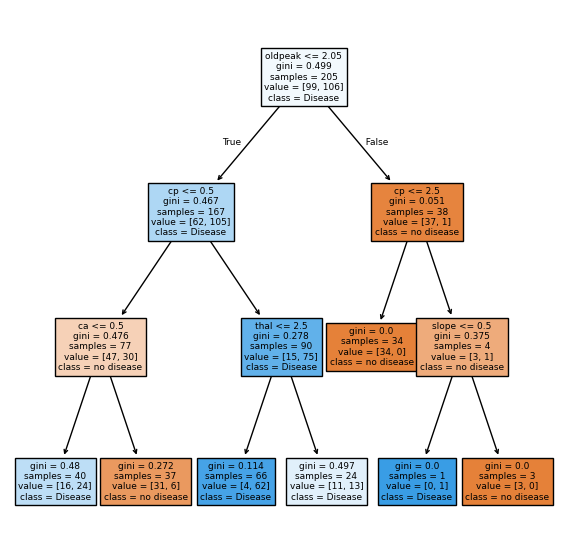

In [50]:
plt.figure(figsize=(7,7))
plot_tree(model,filled=True, feature_names=x.columns, class_names=["no disease", "Disease"] )
plt.show()